# Problem Statement:
### Avacado Project

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

# Importing Libraries

In [180]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats

######################################
       Import Key Packages            
######################################


# Importing Dataset

In [181]:
df = pd.read_csv("avocado.csv")

In [182]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


I can see an unecessary column Unnamed:0 which should I dropped directly

In [183]:
# Drop unnecessary feature

df = df.drop('Unnamed: 0', axis=1)

# Check Null Values

In [184]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We have no null values hopefully!!

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Describing the data

In [186]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There is no null in the data. We will explore other aspects such as

Lets see for how many years does the data is available ?

The types of avacados ?

The regions ?

In [187]:
print(df.type.unique())
print(df.year.unique())
print(df.region.unique())

['conventional' 'organic']
[2015 2016 2017 2018]
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


Observation- We can see there are 2 types of Avocado 

Years are from 2015 to 2018

For region we have many regions present

# EDA

In [188]:
# lets check the quantity of Avocado type sold on these years
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

Observation- 2018 less sale has been occured

# Visualization of Data :

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


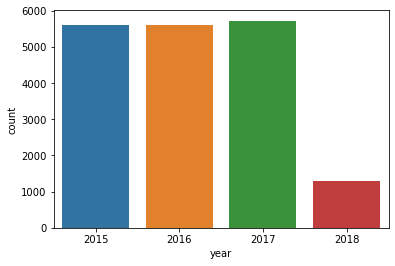

In [189]:
ax = sns.countplot(x="year",data=df)
print(df["year"].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


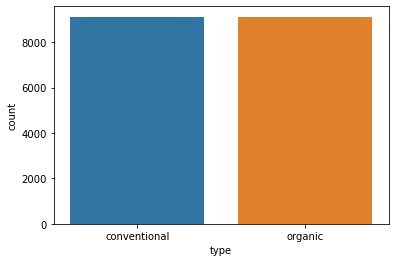

In [190]:
ax = sns.countplot(x="type",data=df)
print(df["type"].value_counts())

<AxesSubplot:xlabel='type', ylabel='year'>

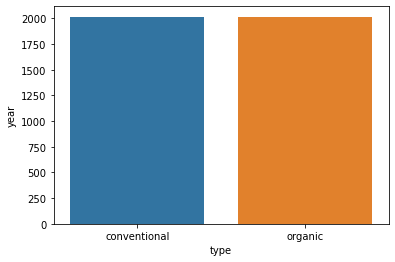

In [191]:
sns.barplot(x="type",y="year",data=df)

Most sold in 2017 and and least on 2018

# Distribution of Average Price:

In [192]:
cont_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

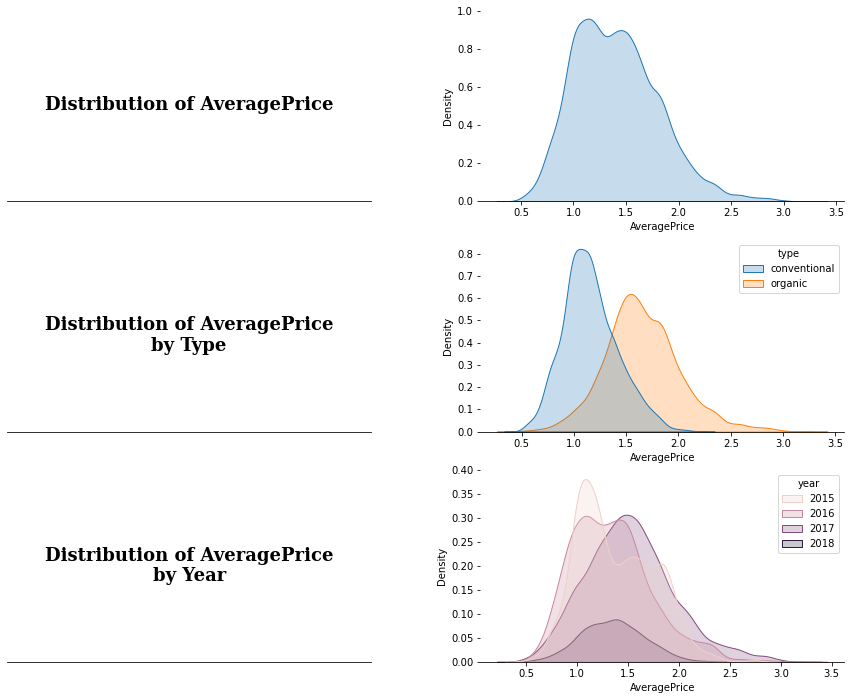

In [206]:
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(3, 2)
gs.update(hspace=0.2, wspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])


axes = [ax0, ax1, ax2, ax3, ax4, ax5]


# Title1
ax0.text(0.5, 0.5, 'Distribution of AveragePrice',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')

# Graph1
sns.kdeplot(x='AveragePrice', data=df, fill=True, ax=ax1)



# Title2
ax2.text(0.5, 0.5, 'Distribution of AveragePrice\nby Type',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')

# Graph2
sns.kdeplot(x='AveragePrice', data=df, fill=True, hue='type', ax=ax3)



# Title3
ax4.text(0.5, 0.5, 'Distribution of AveragePrice\nby Year',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')

# Graph3
sns.kdeplot(x='AveragePrice', data=df, fill=True, hue='year', ax=ax5)



# Settings
for ax in axes:
    
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

for ax in [ax0, ax2, ax4]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)

# Distribution of Continuous Features

In [97]:
cont_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

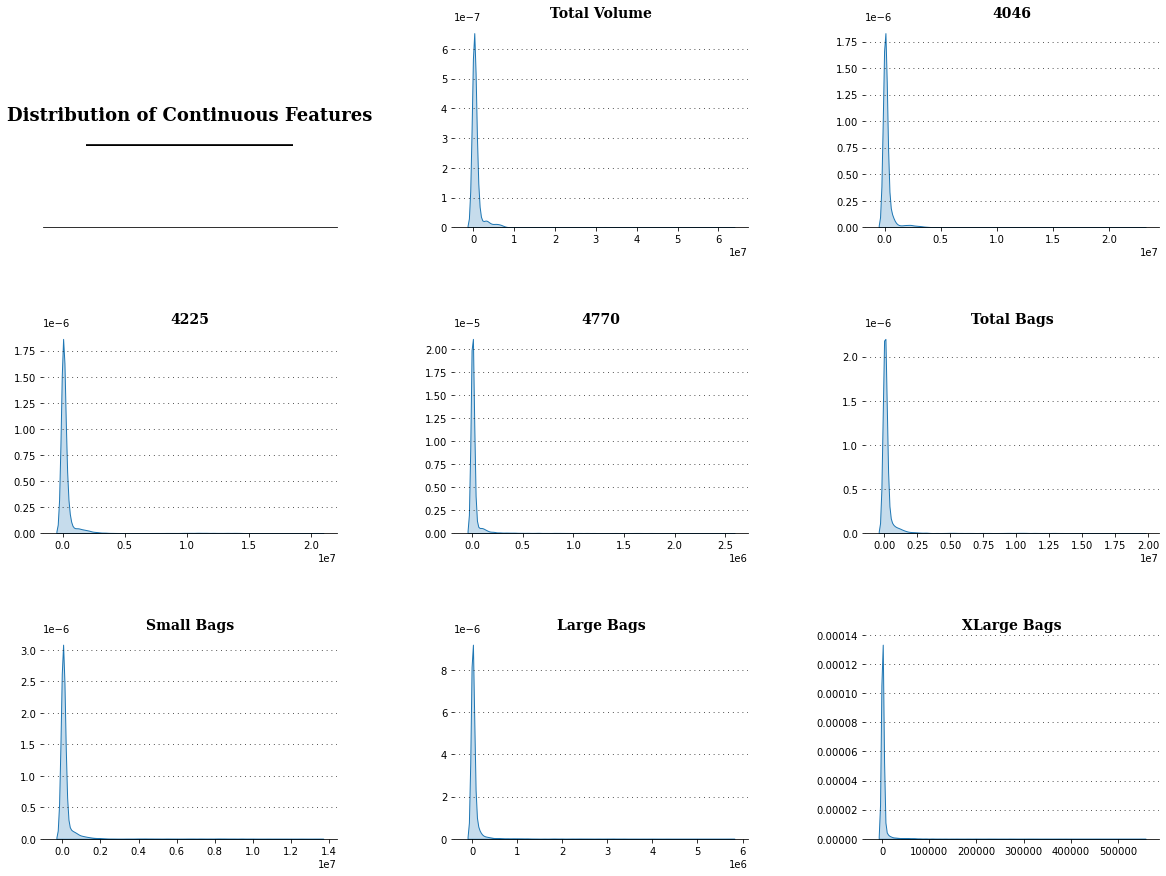

In [98]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]


# Title
ax0.text(0.5, 0.5, 'Distribution of Continuous Features\n_______________________',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')

# Graphs
for i, ax in enumerate(axes):
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)
        
  
    
    if i == 0:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
       # ax.spines[['bottom']].set_visible(False)
    else:
        ax.set_title(cont_features[i-1], fontsize=14, fontfamily='serif', fontweight='bold')
        ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
        sns.kdeplot(x=cont_features[i-1], data=df, ax=ax, fill=True)
        ax.set_xlabel('')
        ax.set_ylabel('')

Observations- on 2017 we can see that price increased most. I have googled about this and find out that due to unsuccessful harvests and rises in demand, avocado prices are doubled on 2017. If you want more information you can read this article-https://globaledge.msu.edu/blog/post/53425/2017-sees-a-shocking-increase-in-avocado#:~:text=Due%20to%20unsuccessful%20harvests%20and,predicted%20to%20double%20this%20summer.

Organic is high priced than conventional

Continious features are very much skewed up

# Correlation of the columns with the target columns :


In [207]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

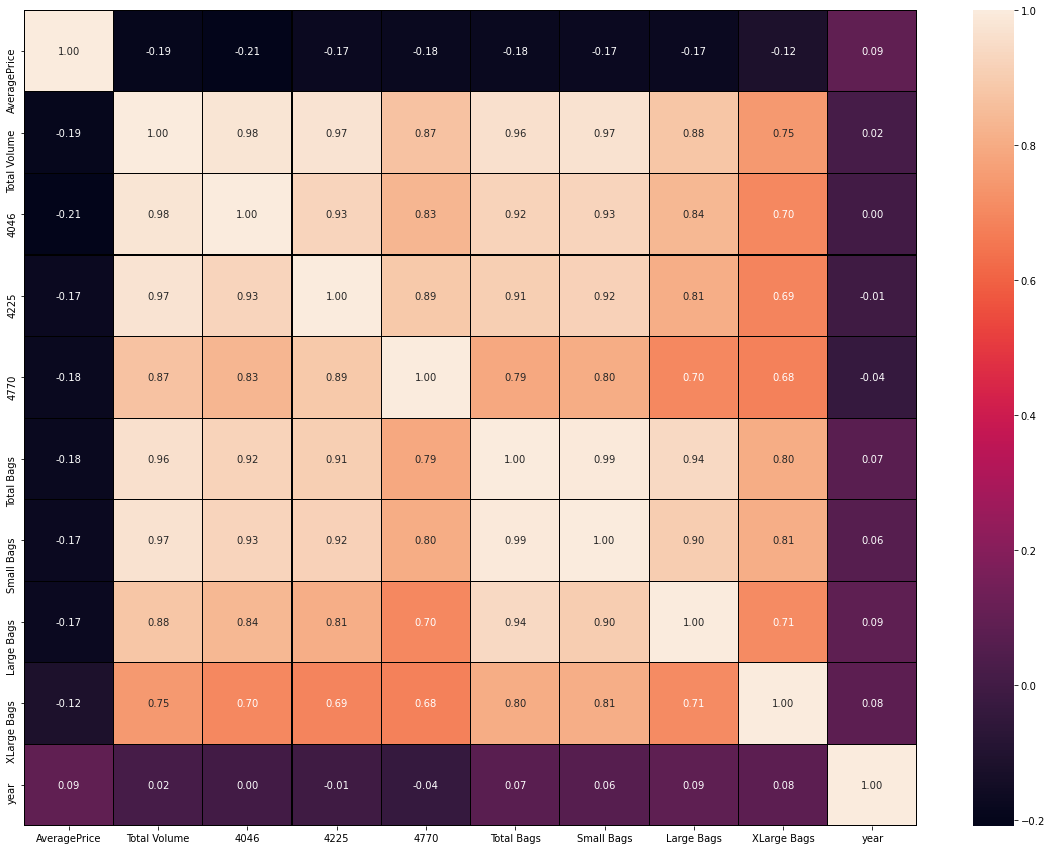

In [208]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

# Preprocessing

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### Using Label encoder for categorical features

In [210]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])
df['region'] = label.fit_transform(df['region'])

In [211]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.drop('Date', axis=1, inplace=True)

In [212]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


# Checking skewness

In [213]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
dtype: float64

#### Observation- considering skewness between +0.5 and -0.5
Apart from AveragePrice,year and Month all the other columns are having skewness

# Removing skewness-


In [214]:
df.shape

(18249, 13)

### Using numpy.log1p() to remove the skewness nearest to 0.55
This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

log1p is reverse of exp(x) – 1

In [215]:
for col in cont_features:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [216]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
dtype: float64

 now the skewness has been removed from the dataset

# Lets check the distribution of continious data again

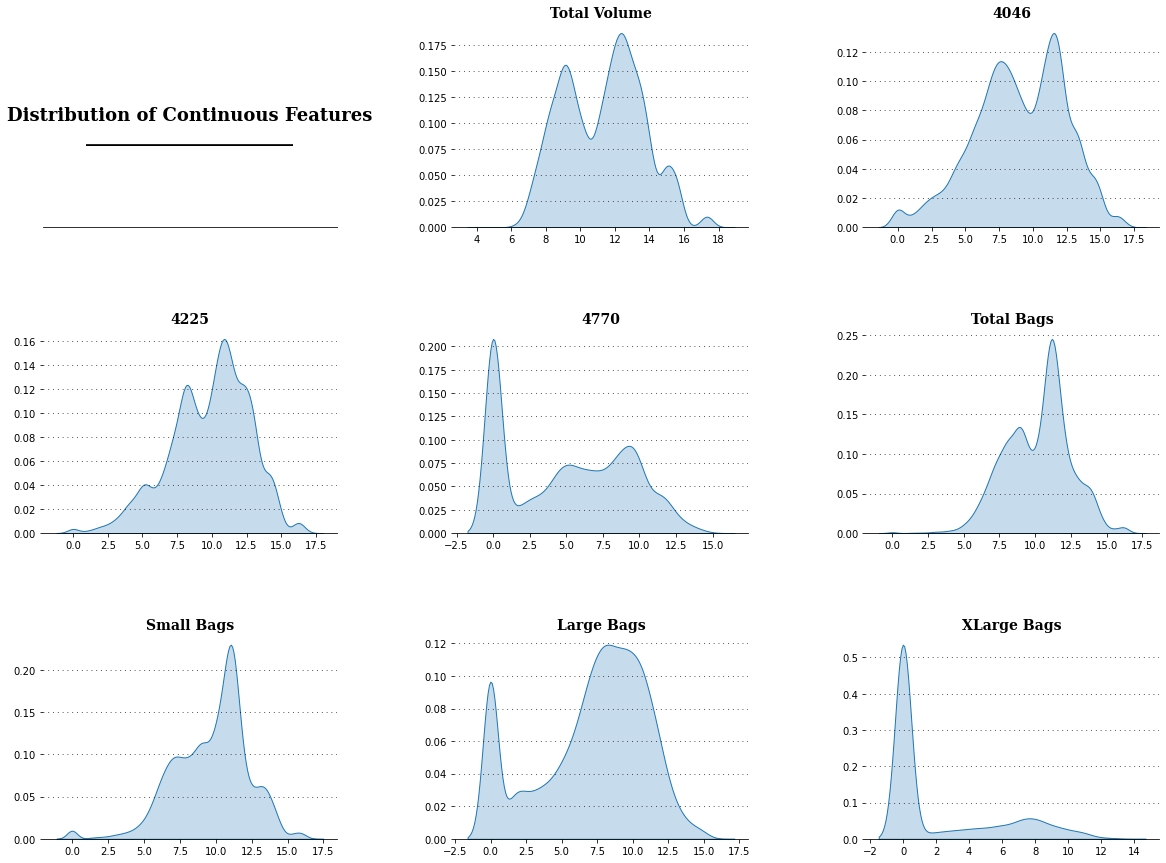

In [217]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]


# Title
ax0.text(0.5, 0.5, 'Distribution of Continuous Features\n_______________________',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')

# Graphs
for i, ax in enumerate(axes):
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)
        
  
    
    if i == 0:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
       # ax.spines[['bottom']].set_visible(False)
    else:
        ax.set_title(cont_features[i-1], fontsize=14, fontfamily='serif', fontweight='bold')
        ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
        sns.kdeplot(x=cont_features[i-1], data=df, ax=ax, fill=True)
        ax.set_xlabel('')
        ax.set_ylabel('')

Now the data is looking good

Observation- 4770,XLarge is left skewed

Others columns are right skewed

# Lets check the outliers using BoxPlot

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

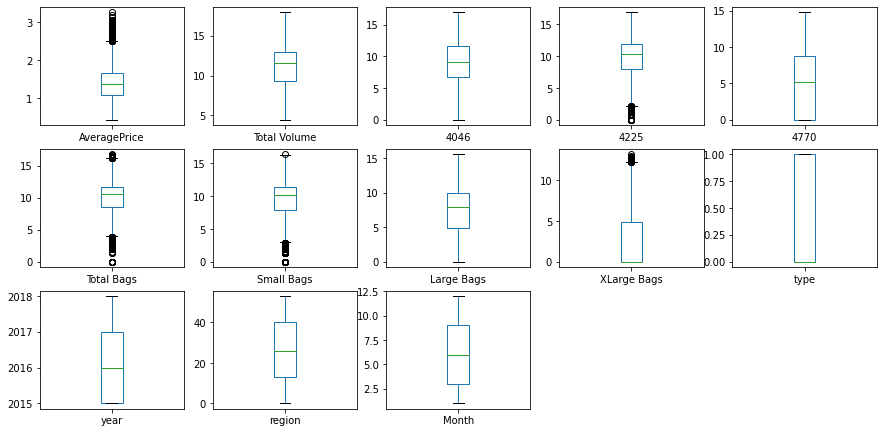

In [218]:
df.plot(kind='box',subplots=True, layout=(4,5),figsize=(15,10))

Observation- AveragePrice, 4225,Total Bags, Small Bags and XLarge has outliers present so I will go with the outliers removal technique


# Considering the Outlier removal

In [219]:
df.shape

(18249, 13)

In [220]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold =3 
np.where(z>3)

(array([ 5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
         9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
         9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
         9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
        10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
        10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
        10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
        11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022,
        11023, 11024, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
        11031, 11032, 11033, 11034, 11035, 11036, 11037, 11039, 11040,
        11041, 11042, 11314, 11316, 11318, 11319, 11320, 11320, 11320,
        11321, 11321, 11321, 11322, 11323, 11324, 11324, 11325, 11325,
        11325, 11326, 11326, 11327, 11327, 11328, 11329, 11329, 11330,
        11330, 11331, 11331, 11332, 11332, 11333, 11333, 11334, 11335,
      

In [221]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1


In [222]:
df_new_z.shape

(17834, 13)

# Percentage of Loss of data:

In [225]:
data_loss = ((18249-17834)/18249)*100

In [226]:
data_loss

2.2740972108060715

around 2% of Data has been loss. To remove skewness of so many columns I think it is good as only 3.5% data is loss

In [227]:
df_new_z.skew()

AveragePrice    0.413916
Total Volume    0.062751
4046           -0.356673
4225           -0.413289
4770            0.063880
Total Bags     -0.117007
Small Bags     -0.262736
Large Bags     -0.567968
XLarge Bags     1.142228
type            0.045547
year            0.209500
region          0.021042
Month           0.116169
dtype: float64

# Checking again Box plot for skewness

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

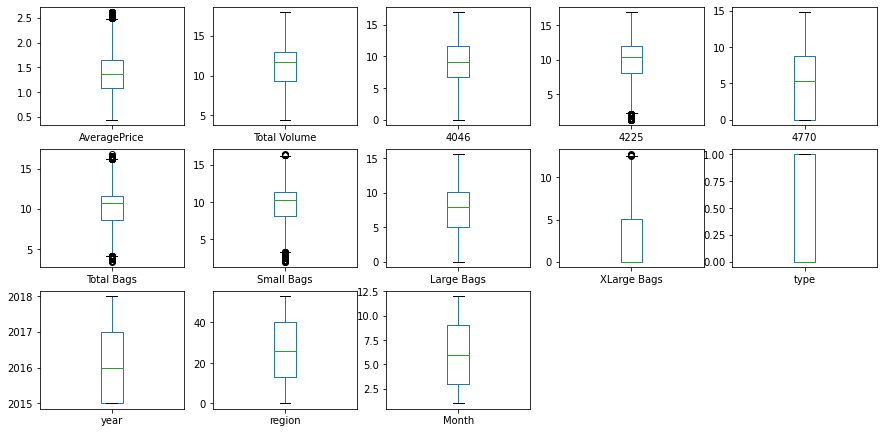

In [228]:
df_new_z.plot(kind='box',subplots=True, layout=(4,5),figsize=(15,10))

Now the skewness has been reduced to a certain extent now lets see the heatmap with correlation

### Checking Heatmap for correlation

<AxesSubplot:>

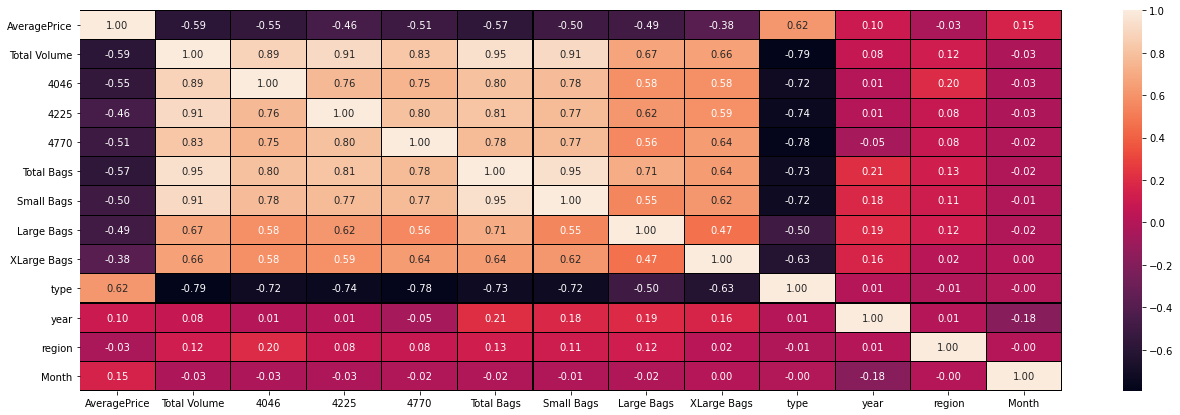

In [229]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df_new_z.corr(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

# Checking VIF 

In [230]:
names = list(df_new_z.drop(columns=["AveragePrice","type"]))

In [231]:
import statsmodels.api as sm

for index in range(0, len(names)):
            y = df_new_z.loc[:, df.columns == names[index]]
            x = df_new_z.loc[:, df.columns != names[index]]
            model = sm.OLS(y, x)                       #Fit ordinary least squares methodhttp://localhost:8888/notebooks/baseball%20predict.ipynb#
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names [index], (round(rsq, 2))))
           
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif))
            print()

R Square value of Total Volume column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Total Volume column is 1386.07 n

R Square value of 4046 column is 0.98 keeping all other columns as independent features
Variance Inflation Factor of 4046 column is 53.1 n

R Square value of 4225 column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of 4225 column is 142.87 n

R Square value of 4770 column is 0.9 keeping all other columns as independent features
Variance Inflation Factor of 4770 column is 10.2 n

R Square value of Total Bags column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Total Bags column is 726.21 n

R Square value of Small Bags column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of Small Bags column is 291.33 n

R Square value of Large Bags column is 0.93 keeping all other columns as independent features
Variance Inflation Fa

# Model Building

## Predicting Average Price

In [232]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_new_z.drop('AveragePrice', axis=1)
y = df_new_z['AveragePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

### Linear Regression

In [233]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.5733
Test Score : 0.5701


### Ridge

In [234]:
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.5733
Test Score : 0.5701


### Gradient Boost

In [235]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.7669
Test Score : 0.7575


### K-Nearest Neighbors

In [236]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9252
Test Score : 0.8689


### Random Forest

In [237]:
model = RandomForestRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9846
Test Score : 0.8935


### Decision Tree

In [238]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 1.0000
Test Score : 0.7527


# Hyperparameter Tuning

In [239]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

### Ridge

In [240]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(ridge_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.5701
Best Parameters : {'alpha': 1}
Best CV Score : 0.5722


### Gradient Boost

In [241]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.9098
Best Parameters : {'max_depth': 9}
Best CV Score : 0.9019


### K-Nearest Neighbors

In [242]:
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(knr_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.8769
Best Parameters : {'n_neighbors': 3}
Best CV Score : 0.8725


### Random Forest

In [243]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Random Forest')
scores.append(rf_score)

Test Score : 0.8924
Best Parameters : {'max_depth': 25}
Best CV Score : 0.8825


### Decision Tree

In [244]:
am_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(dt_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.7601
Best Parameters : {'max_depth': 15}
Best CV Score : 0.7538


### Result

In [245]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.570124
1,Gradient Boost,0.909785
2,K-Nearest Neighbors,0.876870
3,Random Forest,0.892398
4,Decision Tree,0.760069


### Conclusion
Gradient Boost Regression gave the best accuracy so we can use Gradient Boost to predict the Average Price

# Prediction with Region

In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [247]:
X1 = df_new_z.drop('region', axis=1)
y1 = df_new_z['region']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=0)

## Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  55.11634426689095
[[50  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 45 ...  0  0  3]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  2  0 ...  0  0 15]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        75
           1       0.23      0.36      0.28        61
           2       0.66      0.68      0.67        66
           3       0.65      0.43      0.52        69
           4       0.50      0.48      0.49        75
           5       0.58      0.62      0.60        52
           6       0.95      0.93      0.94        86
           7       0.66      0.57      0.61        68
           8       0.75      0.81      0.78        72
           9       0.52      0.76      0.62        63
          10       0.42      0.36      0.39        75
          11       0.61      0.71      0.66        65
          12       0.65      0.54      0.59        89
          13       0.28      0.21      0.24        63
     

## Decision Tree Classifier

In [249]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  79.81497056349875
[[53  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  2]
 [ 0  0 63 ...  0  0  2]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  1 54  0]
 [ 0  1  2 ...  0  0 38]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        75
           1       0.77      0.75      0.76        61
           2       0.82      0.95      0.88        66
           3       0.84      0.75      0.79        69
           4       0.81      0.77      0.79        75
           5       0.56      0.63      0.59        52
           6       0.94      0.98      0.96        86
           7       0.90      0.79      0.84        68
           8       0.94      0.90      0.92        72
           9       0.79      0.86      0.82        63
          10       0.68      0.72      0.70        75
          11       0.88      0.92      0.90        65
          12       0.86      0.75      0.80        89
          13       0.71      0.70      0.70        63
     

## Random Forest Classifier

In [250]:
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    print("Accuracy ", accuracy_score(y_test,predrf)*100)
    print(confusion_matrix(y_test,predrf))
    print(classification_report(y_test,predrf))

Accuracy  91.47743201569946
[[69  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  1 59  0]
 [ 0  0  1 ...  0  0 54]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        75
           1       0.87      0.87      0.87        61
           2       0.96      1.00      0.98        66
           3       0.93      0.80      0.86        69
           4       0.95      0.99      0.97        75
           5       0.89      0.75      0.81        52
           6       0.99      0.99      0.99        86
           7       0.98      0.93      0.95        68
           8       0.99      0.99      0.99        72
           9       0.87      0.92      0.89        63
          10       0.82      0.91      0.86        75
          11       0.93      0.98      0.96        65
          12       0.99      0.94      0.97        89
          13       0.78      0.84      0.81        63
     

## SVC

In [251]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  82.02971684889263
[[68  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  1 ...  0  0 49]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        75
           1       0.56      0.59      0.58        61
           2       0.92      1.00      0.96        66
           3       0.88      0.62      0.73        69
           4       0.89      0.91      0.90        75
           5       0.91      0.79      0.85        52
           6       0.99      0.99      0.99        86
           7       0.85      0.81      0.83        68
           8       0.97      0.99      0.98        72
           9       0.65      0.86      0.74        63
          10       0.59      0.72      0.65        75
          11       0.87      0.91      0.89        65
          12       0.93      0.94      0.94        89
          13       0.63      0.54      0.58        63
     

# Cross Validation

### Logistic Regression

In [252]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,X_scaled,y1,cv=5)
print("Cross validation score of Logistic  model :", scr.mean())

Cross validation score of Logistic  model : 0.4091012822248438


### Random Forest

In [253]:
scr = cross_val_score(rf,X_scaled,y1,cv=5)
print("Cross validation score of Random Forest  model :", scr.mean())

Cross validation score of Random Forest  model : 0.6800947364299874


### SVC 

In [254]:
scr = cross_val_score(svc,X_scaled,y1,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.5948097008770966


#### Observation-
Random Forest gave us the most accuracy with highest Cross validation score as well as we will try to hyper tune the Random forest classifier

# Hyper Parameter Tuning

In [259]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [7,8,9,10,11],
             'criterion': ['gini','entropy']}

In [260]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) 
GCV.best_params_


{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto'}

In [261]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8861788617886179

# Conslusion

In [262]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com

,Original,Predicted
0,32,32
1,30,30
2,30,30
3,20,20
4,9,9
...,...,...
3562,7,7
3563,7,7
3564,14,14
3565,28,28


# Saving Model

### For Average Price

In [263]:
import pickle
filename = 'Avocado_avg_price.pkl'
pickle.dump(model,open(filename, 'wb'))

### For Region Prediction

In [179]:
import pickle
filename = 'Avocado_region_select.pkl'
pickle.dump(GCV.best_params_,open(filename, 'wb'))